Import

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
from math import pi

Global variables

In [66]:
GREY_LIGHT = "#f6f6f6"
WHITE = "#ffffff"
BACKGROUND = "#fff9f5"
COLORS = [ "#2c7bb6", "#fdae61", "#d7191c"]
CATEGORIES = ["Win rate", "Podium rate", "Pole rate", "Fastest lap rate"]
# Padding used to customize the location of the tick labels
X_VERTICAL_TICK_PADDING = 3
X_HORIZONTAL_TICK_PADDING = 35  

In [67]:
def convertData(data, title, name):
    pilots = {"pilot1":[],"pilot2":[]}

    #preparazione dati
    for category in data:
        if category == "QUALI D1":
            countPole = 0
            for position in data[category]:
                if position == 1:
                    countPole += 1
            pilots["pilot1"].append(countPole)
        elif category == "QUALI D2":
            countPole = 0
            for position in data[category]:
                if position == 1:
                    countPole += 1
            pilots["pilot2"].append(countPole)
        elif category == "QUALI D3":
            countPole = 0
            for position in data[category]:
                if position == 1:
                    countPole += 1
            pilots["pilot3"].append(countPole)
        elif category == "POS D1":
            countWin = 0
            countPodium = 0
            for qualification in data[category]:
                if qualification <= 3:
                    countPodium += 1
                    if qualification == 1:
                        countWin += 1
            pilots["pilot1"].append(countWin)
            pilots["pilot1"].append(countPodium)
        elif category == "POS D2":
            countWin = 0
            countPodium = 0
            for qualification in data[category]:
                if qualification <= 3:
                    countPodium += 1
                    if qualification == 1:
                        countWin += 1
            pilots["pilot2"].append(countWin)
            pilots["pilot2"].append(countPodium)
        elif category == "POS D3":
            countWin = 0
            countPodium = 0
            pilots["pilot3"] = []
            for qualification in data[category]:
                if qualification <= 3:
                    countPodium += 1
                    if qualification == 1:
                        countWin += 1
            pilots["pilot3"].append(countWin)
            pilots["pilot3"].append(countPodium)
        elif category == "FAST LAP":
            countPilot1 = 0
            countPilot2 = 0
            countPilot3 = 0
            for lap in data[category]:
                if lap == name[0]:
                    countPilot1 += 1
                elif lap == name[1]:
                    countPilot2 += 1
                if len(name) == 3:
                    if lap == name[2]:
                        countPilot2 += 1
                    
            pilots["pilot1"].append(countPilot1)
            pilots["pilot2"].append(countPilot2)
            if len(name) == 3:
                pilots["pilot3"].append(countPilot3)
    drawChart(pilots, title, name)

In [68]:
def drawChart(pilots, title, name):
    # Initialise the spider plot
    fig = plt.figure()
    ax = fig.add_subplot(111, polar=True)
    fig.patch.set_facecolor(BACKGROUND)

    # number of variable
    N = len(CATEGORIES)
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], CATEGORIES)
    ax.set_facecolor(WHITE)

    # Draw ylabels
    plt.yticks(color="grey", size=8)
    ax.set_title(title, weight='bold', size='large', position=(0.5,1), horizontalalignment='center', verticalalignment='center')
    
    # Adjust tick label positions
    XTICKS = ax.xaxis.get_major_ticks()
    for tick in XTICKS[0::2]:
        tick.set_pad(X_VERTICAL_TICK_PADDING)
        
    for tick in XTICKS[1::2]:
        tick.set_pad(X_HORIZONTAL_TICK_PADDING)
    
    # Draw the lines
    for index, pilot in enumerate(pilots):
        pilots[pilot] += pilots[pilot][:1]
        ax.plot(angles, pilots[pilot], c=COLORS[index], linewidth=2, linestyle='solid', label=name[index])
        ax.scatter(angles, pilots[pilot], s=25, c=COLORS[index], zorder=100)
        ax.fill(angles, pilots[pilot], c=COLORS[index], alpha=0.1)
    
    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    # Show the graph
    plt.show()

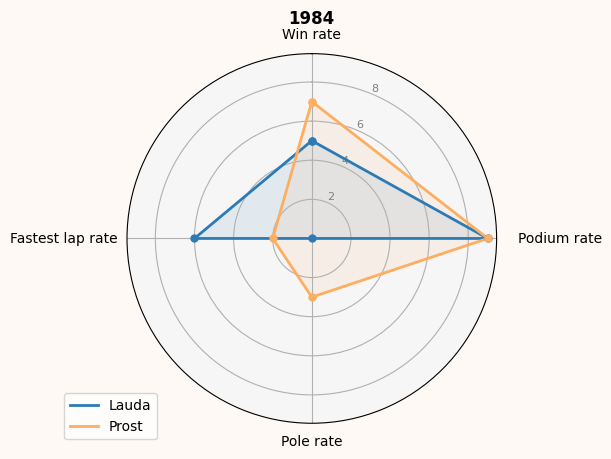

In [69]:
data = pd.read_csv('data/1984results.csv')
convertData(data, "1984", ["Lauda", "Prost"])

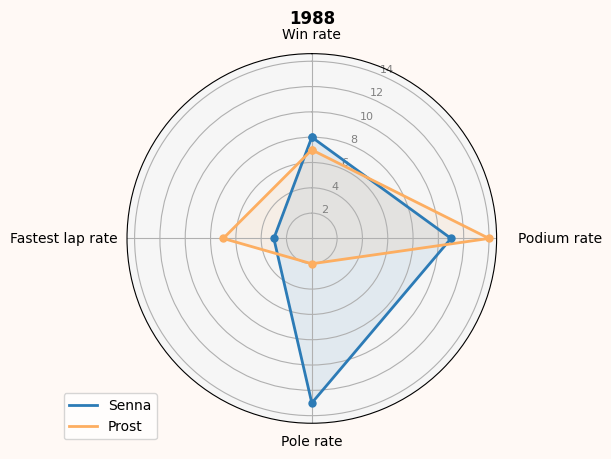

In [70]:
data = pd.read_csv('data/1988results.csv')
convertData(data, "1988", ["Senna", "Prost"]) 

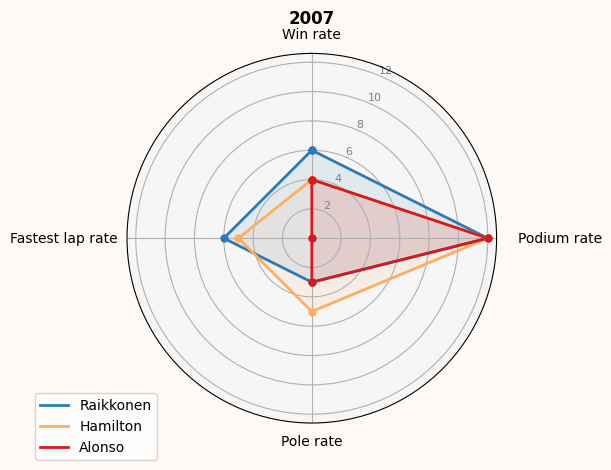

In [71]:
data = pd.read_csv('data/2007results.csv')
convertData(data, "2007", ["Raikkonen", "Hamilton", "Alonso"])

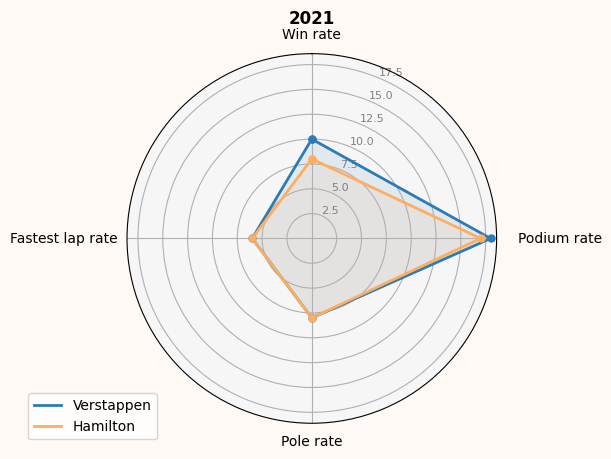

In [72]:
data = pd.read_csv('data/2021results.csv')
convertData(data, "2021", ["Verstappen", "Hamilton"])